In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# This allows charts to show up right here in the page
%matplotlib inline

In [49]:
#load uci dataset
uci_data= pd.read_csv('Data/phishing_uci.csv')
#load phishtank dataset
phishtank_data = pd.read_csv('Data/verified_online.csv')

print("UCI Data Size:", uci_data.shape)
print("PhishTank Data Size:", phishtank_data.shape)

uci_data.head()

UCI Data Size: (11055, 32)
PhishTank Data Size: (56128, 8)


,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


Count of eac type:
Result
 1    6157
-1    4898
Name: count, dtype: int64


C:\Users\VISION\AppData\Local\Temp\ipykernel_10424\1679508824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=uci_data, palette='magma')


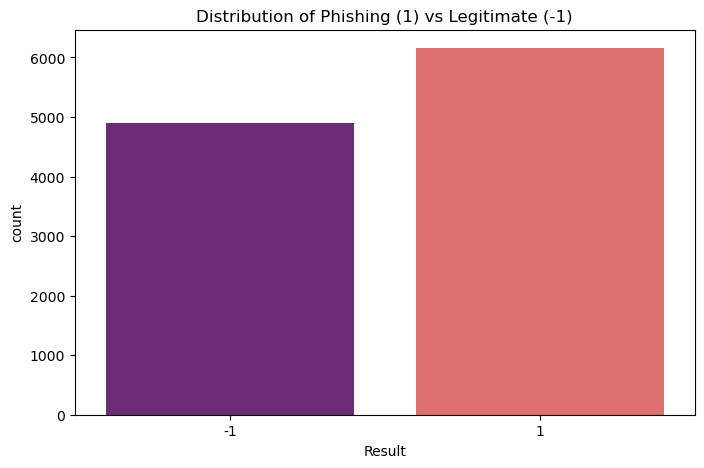

In [50]:
counts =uci_data['Result'].value_counts()
print('Count of eac type:')
print(counts)

plt.figure(figsize=(8, 5))
sns.countplot(x='Result', data=uci_data, palette='magma')
plt.title('Distribution of Phishing (1) vs Legitimate (-1)')
plt.show()

In [52]:
from urllib.parse import urlparse  #it is used to break the url

def check_url_length(url):
    if len(url) < 54:
        return -1
    elif len(url)>= 54 and len(url) <75:
        return 0
    else:
        return 1

def check_symbol(url):
    if "@" in url:
        return 1
    else:
        return -1

def check_https(url):
    if url.startswith("https"):
        return -1
    else :
        return 1


test_url = "http://login-secure-bank-update.com/verify@account"

print(f"URL:{test_url}")
print(f"Length Score:{check_url_length(test_url)}")
print(f"At Symbol Score: {check_symbol(test_url)}")
print(f"HTTPS Score: {check_https(test_url)}")

        

URL:http://login-secure-bank-update.com/verify@account
Length Score:-1
At Symbol Score: 1
HTTPS Score: 1


In [54]:
import re

def check_prefix_suffix(url): 
    domain = urlparse(url).netloc
    if '-' in domain:
        return 1 
    else:
        return -1 

def check_subdomain(url):
    if url.count(".") < 3:
        return -1 
    elif url.count(".") == 3:
        return 0 
    else:
        return 1

def check_https_token(url):
    domain = urlparse(url).netloc
    if 'https' in domain:
        return 1 
    else:
        return -1

test_url = "https://secure-login-bank.com/update"
print(f"URL: {test_url}")
print(f"Prefix/Suffix Score: {check_prefix_suffix(test_url)}")
print(f"HTTPS Token Score: {check_https_token(test_url)}")

URL: https://secure-login-bank.com/update
Prefix/Suffix Score: 1
HTTPS Token Score: -1


In [55]:
raw_data = pd.read_csv('Data/verified_online.csv')
urls = raw_data['url'].head(100)
feature_list = []
for url in urls:
    features = {
        'url': url,
        'URL_Length': check_url_length(url),
        'At_Symbol': check_symbol(url),
        'Prefix_Suffix': check_prefix_suffix(url),
        'HTTPS_Token': check_https_token(url)
    }
    feature_list.append(features)

feature_matrix = pd.DataFrame(feature_list)
print(feature_matrix.head())

                                                 url  URL_Length  At_Symbol  \
0        http://allegrolokalnie.pl-oferta6385272.cfd          -1         -1   
1  http://allegrolokalnie.oferta76381-dla-ciebie.sbs          -1         -1   
2  https://kutxabank.app-servicioslogin.com/acces...           0         -1   
3               https://startdus.ghost.io/trezor-en/          -1         -1   
4    https://started-webguide.ghost.io/suite-crypto/          -1         -1   

   Prefix_Suffix  HTTPS_Token  
0              1           -1  
1              1           -1  
2              1           -1  
3             -1           -1  
4              1           -1  


In [64]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('Data/phishing_uci.csv')
df = df.drop(['id'], axis=1)
X = df.drop(['Result'], axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Data successfully split
Training samples: 8844
Testing samples: 2211


In [66]:
# training random forest model

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Training Complete")
print(f"Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Training Complete
Accuracy: 96.70%
